## Coin Market Automating API Extraction

In this project, I will build a programm that automates the process of extracting the data from the website https://coinmarketcap.com/. Then I will try to explore this data briefly.  

## Importing Libraries

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import csv
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# display url, parameters, headers
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '96b532e9-3abd-4b60-8869-e78f065c2a7e',
}

session = Session()
session.headers.update(headers)

# load the data
try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2025-09-17T18:09:04.614Z', 'error_code': 0, 'error_message': None, 'elapsed': 45, 'credit_count': 1, 'notice': None, 'total_count': 9479}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12364, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
type(data)

dict

In [5]:
# that allows us to see all the columns and rows)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# normalize the data and make it pretty in a dataframe:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12364,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.992227e+07,1.992227e+07,False,NaN,1,NaN,NaN,None,2025-09-17T18:08:00.000Z,115953.746122,4.988028e+10,9.1705,0.139571,-0.726293,1.901861,-0.432126,-1.702261,10.781199,2.310062e+12,57.3895,2.435029e+12,None,2025-09-17T18:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-17 13:09:03.280507
1,1027,Ethereum,ETH,ethereum,10752,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207043e+08,1.207043e+08,True,NaN,2,NaN,NaN,None,2025-09-17T18:07:00.000Z,4494.722442,3.469243e+10,8.2820,0.029579,-0.029714,3.016055,3.457103,26.561756,78.734578,5.425324e+11,13.4502,5.425324e+11,None,2025-09-17T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-17 13:09:03.280507
2,52,XRP,XRP,xrp,1707,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.972604e+10,9.998580e+10,False,NaN,3,NaN,NaN,None,2025-09-17T18:07:00.000Z,3.055504,4.557695e+09,-7.2184,1.082120,0.178372,1.725713,-0.138996,-10.627515,40.613082,1.824931e+11,4.5293,3.055504e+11,None,2025-09-17T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-17 13:09:03.280507
3,825,Tether USDt,USDT,tether,147854,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.709503e+11,1.747218e+11,True,NaN,4,NaN,NaN,None,2025-09-17T18:07:00.000Z,1.000676,1.225722e+11,5.3671,0.039824,0.026135,0.059843,0.017332,0.038072,0.052523,1.710659e+11,4.2410,1.748399e+11,None,2025-09-17T18:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-17 13:09:03.280507
4,1839,BNB,BNB,bnb,2726,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.391868e+08,1.391868e+08,False,NaN,5,NaN,NaN,None,2025-09-17T18:07:00.000Z,955.671196,3.011901e+09,9.2331,0.455256,0.165644,6.539026,13.097209,30.806299,48.733002,1.330168e+11,3.2977,1.330168e+11,None,2025-09-17T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-17 13:09:03.280507


In [7]:
# create a function that extracts coin market data and store it in a dataframe

In [8]:
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '96b532e9-3abd-4b60-8869-e78f065c2a7e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # normalize the data and make it pretty in a dataframe:
    df2 = pd.json_normalize(data['data']) # flatten the json data into a flat table (a dataframe)
    df2['timestamp'] = pd.to_datetime('now')
    
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
    

In [9]:
# make the program sleep for 1 minute and then run again automatically
for i in range(333):
    api_runner()
    print('API Runner completed!')
    sleep(60) 
exit()
    

API Runner completed!
API Runner completed!


KeyboardInterrupt: 

In [10]:
# to change the default display format for floating-point numbers in the  DataFrame:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [11]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12364,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19922268.00000,19922268.00000,False,NaN,1,NaN,NaN,None,2025-09-17T18:08:00.000Z,115953.74612,49880283259.97282,9.17050,0.13957,-0.72629,1.90186,-0.43213,-1.70226,10.78120,2310061605841.92432,57.38950,2435028668557.24023,None,2025-09-17T18:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-17 13:09:03.280507
1,1027,Ethereum,ETH,ethereum,10752,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120704318.86275,120704318.86275,True,NaN,2,NaN,NaN,None,2025-09-17T18:07:00.000Z,4494.72244,34692433859.56422,8.28200,0.02958,-0.02971,3.01605,3.45710,26.56176,78.73458,542532410844.94977,13.45020,542532410844.95001,None,2025-09-17T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-17 13:09:03.280507
2,52,XRP,XRP,xrp,1707,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59726035800.00000,99985804018.00000,False,NaN,3,NaN,NaN,None,2025-09-17T18:07:00.000Z,3.05550,4557695444.77068,-7.21840,1.08212,0.17837,1.72571,-0.13900,-10.62751,40.61308,182493129296.37717,4.52930,305550379917.19000,None,2025-09-17T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-17 13:09:03.280507
3,825,Tether USDt,USDT,tether,147854,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,170950286174.40594,174721778009.13943,True,NaN,4,NaN,NaN,None,2025-09-17T18:07:00.000Z,1.00068,122572192682.33394,5.36710,0.03982,0.02613,0.05984,0.01733,0.03807,0.05252,171065894910.35684,4.24100,174839937295.98001,None,2025-09-17T18:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-17 13:09:03.280507
4,1839,BNB,BNB,bnb,2726,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139186829.69000,139186829.69000,False,NaN,5,NaN,NaN,None,2025-09-17T18:07:00.000Z,955.67120,3011901390.55782,9.23310,0.45526,0.16564,6.53903,13.09721,30.80630,48.73300,133016843952.50444,3.29770,133016843952.50000,None,2025-09-17T18:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-17 13:09:03.280507


In [12]:
# Now let's look at the coin trends over time
# group the data by name of cryptocurrency

df3_grouped = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3_grouped

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13957,-0.72629,1.90186,-0.43213,-1.70226,10.78120
Ethereum,0.03897,-0.04048,3.04482,3.45832,26.54737,78.67343
XRP,1.06626,0.15808,1.70893,-0.15691,-10.64822,40.58052
Tether USDt,0.03063,0.01709,0.05075,0.00450,0.03108,0.04664
BNB,0.44376,0.15077,6.52925,13.08535,30.78829,48.71285
Solana,1.22112,-0.63975,6.45806,28.81169,34.31111,63.13055
USDC,0.02169,0.00283,0.03060,0.01334,0.02495,0.01721
Dogecoin,0.87174,0.67658,9.60740,20.69456,11.22878,57.96772
TRON,0.19266,-0.44966,0.44654,-2.23984,6.64337,24.55302


In [14]:
# aggregation of the DF group by object:
df3_aggregated = df3_grouped.sum()
df3_aggregated

quote.USD.percent_change_1h     10.11046
quote.USD.percent_change_24h     0.42256
quote.USD.percent_change_7d     35.34811
quote.USD.percent_change_30d   105.27787
quote.USD.percent_change_60d   180.44364
quote.USD.percent_change_90d   593.79949
dtype: float64

In [17]:
# to make the columns as rows

df4=df3_grouped.stack()
df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h     0.13957
         quote.USD.percent_change_24h   -0.72629
         quote.USD.percent_change_7d     1.90186
         quote.USD.percent_change_30d   -0.43213
         quote.USD.percent_change_60d   -1.70226
dtype: float64

In [19]:
# return back to a dataframe:
df5 = df4.to_frame(name='values')
df5.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.13957
        quote.USD.percent_change_24h -0.72629
        quote.USD.percent_change_7d   1.90186
        quote.USD.percent_change_30d -0.43213
        quote.USD.percent_change_60d -1.70226

In [20]:
df6 = df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.13957
1,Bitcoin,quote.USD.percent_change_24h,-0.72629
2,Bitcoin,quote.USD.percent_change_7d,1.90186
3,Bitcoin,quote.USD.percent_change_30d,-0.43213
4,Bitcoin,quote.USD.percent_change_60d,-1.70226


In [21]:
# rename the column level_1:
df7 = df6.rename(columns={'level_1':'percentage_change'})
df7.head()

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13957
1,Bitcoin,quote.USD.percent_change_24h,-0.72629
2,Bitcoin,quote.USD.percent_change_7d,1.90186
3,Bitcoin,quote.USD.percent_change_30d,-0.43213
4,Bitcoin,quote.USD.percent_change_60d,-1.70226


In [22]:
df7['percentage_change']=df7['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

In [23]:
df7

,name,percentage_change,values
0,Bitcoin,1h,0.13957
1,Bitcoin,24h,-0.72629
2,Bitcoin,7d,1.90186
3,Bitcoin,30d,-0.43213
4,Bitcoin,60d,-1.70226
5,Bitcoin,90d,10.78120
6,Ethereum,1h,0.03897
7,Ethereum,24h,-0.04048
8,Ethereum,7d,3.04482
9,Ethereum,30d,3.45832


C:\Users\sanas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


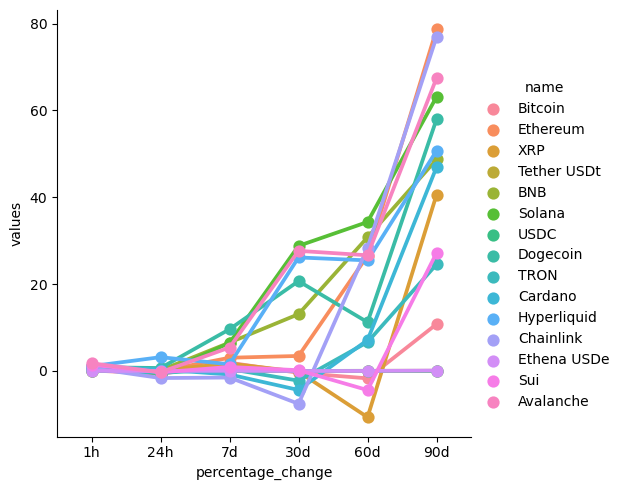

In [24]:
# Visualizing the average of change for each cryptocurrency
# Point Plot: The plot will show points for each combination of percentage change and values,
#connected by lines within each name category to show trends.
sns.catplot(x='percentage_change', y='values', hue='name', data=df7, kind='point')
# the 'hue' parameter is useful because we have multiple groups (name groups) and we want to compare trends over time



In [25]:
# we are going to create a dataframe with the columns we want
df8 = df[['name', 'quote.USD.price','timestamp']]
df8=df8.query("name=='Bitcoin'")

df8


,name,quote.USD.price,timestamp
0,Bitcoin,115953.74612,2025-09-17 13:09:03.280507
0,Bitcoin,115953.74612,2025-09-17 13:09:08.797754
0,Bitcoin,115953.74612,2025-09-17 13:10:09.500047


C:\Users\sanas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sanas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

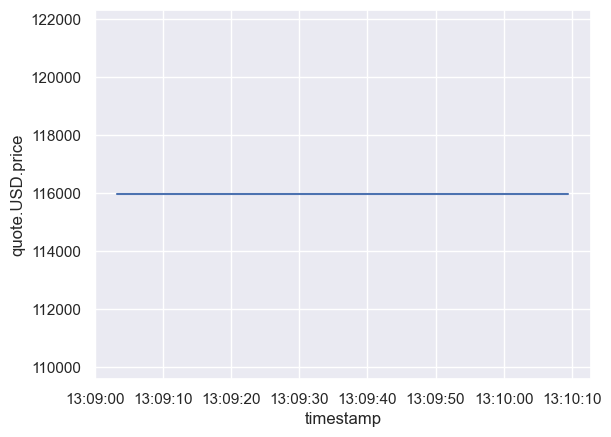

In [26]:
# visualizing the quote.USD.price over time
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)
 